## Exemplifying the LDA on the Facebook data set

_Just as today's lecture, this discussion is in R_

Consider the data set that is described in [this](https://psycnet.apa.org/fulltext/2016-57141-003.html) paper. You can find the data on Canvas. 

The sample data set contains psychodemographic profiles of $n_u=110,728$ Facebook users and their Facebook likes.

1. *users.csv*: contains psychodemographic user profiles. It has $n_u = 110,728$ rows and nine columns: anonymized user ID,
gender (0 for male, 1 for female), age, political views (0 for Democrat, 1 for Republican), and five personality scores, including Openness, Conscientiousness, Extroversion, Agreeableness, and Neuroticism.

2. *likes.csv*: contains anonymized IDs and names of $n_L=1,580,284$ Facebook Likes. It has two columns: ID and name.

3. *users-likes.csv*: contains the associations between users and their Likes, stored as user–Like pairs. It has $n_{u-L}
=10,612,326$ rows and two columns: user ID and Like ID.

In [1]:
# load the files
users = read.csv("users.csv")
likes = read.csv("likes.csv")
ul = read.csv("users-likes.csv")

In [2]:
print(dim(users)) # 110728 users
head(users)

[1] 110728      9


,userid,gender,age,political,ope,con,ext,agr,neu
,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,54f34605aebd63f7680e37ffd299af79,0,33,0,1.26,1.65,1.17,-1.76,0.61
2,86399f8c44ba54224b2e60177ca89fa9,1,35,0,1.07,0.17,-0.14,1.49,0.30
3,84fab50f3c60d1fdc83aa91b5e584a78,1,36,0,0.89,1.28,0.86,1.07,0.99
4,f3b8fdaccce12ef6352bfad4d6052fe9,0,39,NA,0.33,-1.01,-0.33,-0.68,0.92
5,8b06ea5e9cb87c61da387995450607f7,0,31,NA,0.15,0.47,1.17,-1.01,-0.32
6,7a2ec9c1de4ec137367e66ad759ec848,0,38,NA,1.26,0.76,-0.46,-1.76,-0.76


In [3]:
print(dim(likes)) # 1580284 Likes
head(likes)

[1] 1580284       2


,likeid,name
,<chr>,<chr>
1,3c1636c878e6eb2acfd00c6b61086e38,REIGN by Paul Gibson
2,feca46ddb8ef04f86172ace0cb7e004c,Cupcake Wishes & Birthday Dreams
3,b65f46d64c688fe98bdbcf93a76a71fc,Yo tambiÃ©n me rei de la caÃ­da de otro jejeje
4,9c5c8bb82d2cd46fbd7582f944fe370e,Abraham Joshua Heschel Day School- Alumni Network
5,2d82fa84ad79b085dc516dde154327a2,Kennesaw Farmer's Market
6,0a7a01c82143347fc4703faa4e7f415c,Karlsruher SC


In [4]:
print(dim(ul)) # 10612326 user-Like pairs
head(ul)

[1] 10612326        2


,userid,likeid
,<chr>,<chr>
1,71bc7c0901488aec6d30f0add257e7c5,3c1636c878e6eb2acfd00c6b61086e38
2,978ab8e90c4d6ad1a48ef5c973b62f4d,feca46ddb8ef04f86172ace0cb7e004c
3,85123b0e358907725cf19a2cb0ec3983,b65f46d64c688fe98bdbcf93a76a71fc
4,ce110562b3e2f7e5cad3775b32d9caa5,b65f46d64c688fe98bdbcf93a76a71fc
5,8188d20745471273fa69ba44a5b28473,b65f46d64c688fe98bdbcf93a76a71fc
6,e9c621f322640e5f3b3842d19b38aaa8,b65f46d64c688fe98bdbcf93a76a71fc


## Constructing a User-Like Matrix

We proceed to construct a user-Like matrix `M`. The user stored in the $i$th row of the data frame `users` will be put in the $i$th row of matrix `M`, and the Like stored in the $j$th row of the data frame `likes` will be put in the $j$th column of matrix `M`. If the $i$th user likes the $j$th Like, then $M_{i,j}=1$.

In [5]:
ul$user_row = match(ul$userid, users$userid)
ul$like_row = match(ul$likeid, likes$likeid)
head(ul)

,userid,likeid,user_row,like_row
,<chr>,<chr>,<int>,<int>
1,71bc7c0901488aec6d30f0add257e7c5,3c1636c878e6eb2acfd00c6b61086e38,59353,1
2,978ab8e90c4d6ad1a48ef5c973b62f4d,feca46ddb8ef04f86172ace0cb7e004c,36793,2
3,85123b0e358907725cf19a2cb0ec3983,b65f46d64c688fe98bdbcf93a76a71fc,30998,3
4,ce110562b3e2f7e5cad3775b32d9caa5,b65f46d64c688fe98bdbcf93a76a71fc,50637,3
5,8188d20745471273fa69ba44a5b28473,b65f46d64c688fe98bdbcf93a76a71fc,72224,3
6,e9c621f322640e5f3b3842d19b38aaa8,b65f46d64c688fe98bdbcf93a76a71fc,79675,3


In [6]:
library(Matrix)

M = sparseMatrix(i = ul$user_row, j = ul$like_row, x = 1) # user-Like matrix 
rownames(M) = users$userid
colnames(M) = likes$name
dim(M)

[1]  110728 1580284

## Trimming the User-Like Matrix

We use a minimum of 50 Likes per user and a minimum of 150 users per Like to reduce the time required for further analyses.

In [39]:
sum(MF) / (as.double(nrow(MF)) * ncol(MF)) # 0.006% non-zero entries

[1] 6.064821e-05

In [7]:
MF = M # keep the full matrix

repeat {
    i = sum(dim(M))
    M = M[rowSums(M) >= 50, colSums(M) >= 150]
    if (sum(dim(M)) == i)
        break
}

dim(M)

[1] 19742  8523

In [8]:
users = users[match(rownames(M), users$userid),]
dim(users)

[1] 19742     9

In [50]:
sum(M) / (nrow(M) * ncol(M)) # 2.27% non-zero entries

[1] 0.02268998

## Reducing the Dimensionality of the User-Like Matrix Using LDA

Applied to the user-Like matrix $M$ of size $n \times m$, LDA produces matrix $\gamma$ of size $n \times k$, describing the posterior distribution of clusters for each user; and matrix $\beta$ of size $k \times m$, describing the posterior distribution of Likes for each cluster.

Here, we are going to fit the model with Gibbs sampling by specifying `method = "Gibbs"`, you can also try to fit the model using Variational Expectation Maximization (VEM) Algorithm with `method = "VEM"`. To compare Gibbs and VEM, you can check this [paper](https://koreascience.kr/article/JAKO202022449681884.pdf).

In [9]:
library(topicmodels)

# fit the model
Mlda = LDA(M, 
           k = 5,
           control = list(alpha = 10,
                          delta = .1,
                          seed = 68),
          method = "Gibbs")
gamma = Mlda@gamma # posterior topic distribution for each user
beta = exp(Mlda@beta) # posterior like distribution for each topics

In [10]:
dim(gamma)

[1] 19742     5

In [11]:
dim(beta)

[1]    5 8523

In [13]:
sum(gamma[1,]) # topics - posterior probs

[1] 1

In [12]:
sum(beta[1,]) # like - posterior probs

[1] 1

In [14]:
# plot log-likelihood against number of clusters k
## do not run, takes very long
LK = rep(NA, 7)

for (i in 2:8){
 Mlda = LDA(M, 
            k = i, 
            control = list(alpha = 10,
                           delta = .1,
                           seed = 68), 
            method = "Gibbs")
    
 LK[i-1] = logLik(Mlda)
}

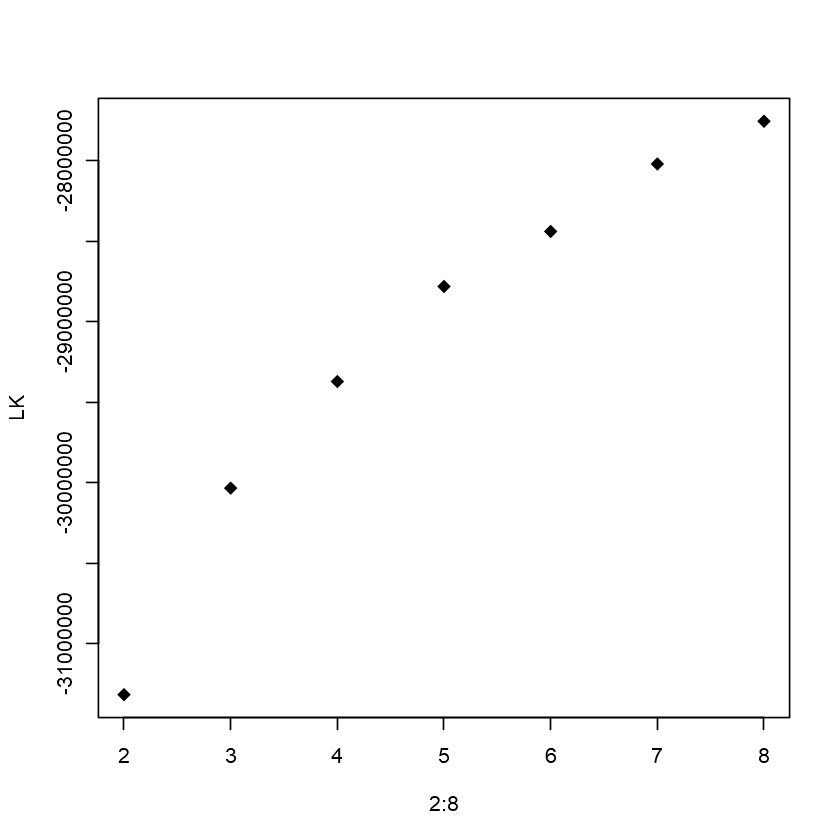

In [15]:
plot(2:8, LK, pch = 18, cex = 1.5)

This plot could be used for selecting the number of clusters $k$. Typically, the log-likelihood grows rapidly for lower ranges of $k$, flattens at higher $k$ values, and may start decreasing once the number of clusters becomes very large. Selecting a $k$ that marks the end of a rapid growth of log-likelihood values usually offers decent interpretability of the topics.

### Interpreting Clusters 

The correlation between users' membership on LDA clusters ($\gamma$) and psychodemographic user traits:

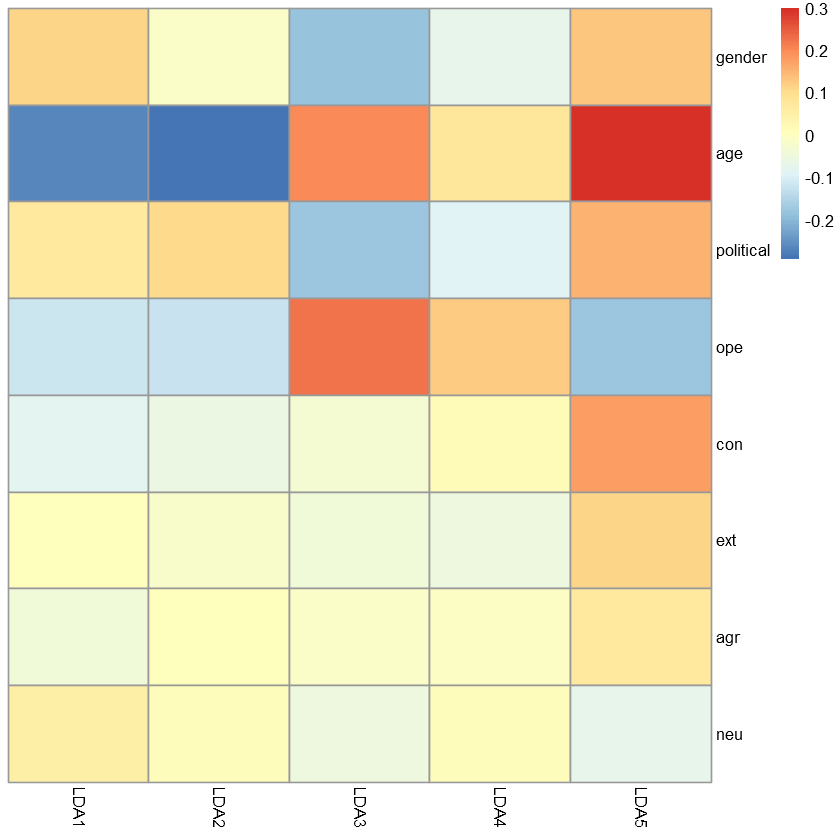

In [16]:
# Interpretation of LDA
Clda = cor(gamma, users[,-1], use = "pairwise") # construct correlation matrix
rownames(Clda) = c("LDA1", "LDA2", "LDA3", "LDA4", "LDA5")

library(pheatmap)
pheatmap(t(Clda), cluster_rows = FALSE, cluster_cols = FALSE)

Find the top 10 Likes most strongly associated with each of the clusters.

In [17]:
top.lda = list()

for (i in 1:5){
  f = order(beta[i,])
  temp = tail(f, n = 10)
  top.lda[[i]] = colnames(M)[temp]
}

In [18]:
top.lda

[[1]]
 [1] "I'd rather do nothing at your house than at mine"                           
 [2] "If you remember the L'Orealkids FISH SHAPED SHAMPOO BOTTLE!"                
 [3] "Open fridge, nothing. Freezer? nothing. Might as well try the fridge again."
 [4] "Comebacks that make the whole room go OOOOOHHHHHH"                          
 [5] "My level of maturity changes depending on who im with."                     
 [6] "I hate it when i'm taking a drink and all the ice attacks my face"          
 [7] "Telling inanimate objects to STAY when they look like they're going to fall"
 [8] "I feel stupid when I say what? a thousand times because I can't hear"       
 [9] "i finally stop laughing... look back over at you and start all over again"  
[10] "Ok, If we get caught here's the story..."                                   

[[2]]
 [1] "Reese's"      "Disney Pixar" "Facebook"     "Owl City"     "Duck Tape"   
 [6] "Music"        "YouTube"      "Oreo"         "Starburst"    "Skittles"    

[[3]]
 [1] "Futurama"                                     
 [2] "The Onion"                                    
 [3] "Barack Obama"                                 
 [4] "The Lord of the Rings Trilogy (Official Page)"
 [5] "Harry Potter"                                 
 [6] "Music"                                        
 [7] "The Daily Show"                               
 [8] "The Colbert Report"                           
 [9] "Queen"                                        
[10] "The Beatles"                                  

[[4]]
 [1] "House"                 "Disturbed"             "Music"                
 [4] "Pink Floyd"            "Metallica"             "The Beatles"          
 [7] "Red Hot Chili Peppers" "Nirvana"               "Linkin Park"          
[10] "Family Guy"           

[[5]]
 [1] "Usher"             "Adam Sandler"      "Taylor Swift"     
 [4] "Katy Perry"        "Lady Gaga"         "Victoria's Secret"
 [7] "The Hangover"      "Rihanna"           "Eminem"           
[10] "Lil Wayne"

## Reducing the Dimensionality of the User-Like Matrix Using SVD

SVD represents a given matrix of size $n \times m$ as a product of three matrices:

$$M=U \Sigma V^\top$$

where $U$ of size $n \times k$ contains left singular vector, $\Sigma$ of size $k \times k$ contains singular values, and $V$ of size $m \times k$ contains right singular vectors, $k$ is the number of dimensions chosen to extract.

Applied to the non-centered user-Like matrix $M$, SVD produces matrix $U$ containing users' scores on the SVD dimensions, and matrix $V$ shows Likes' scores on the SVD dimensions.

In [23]:
set.seed(seed = 68)
library(irlba)

Msvd = irlba(M, nv = 20)
u = Msvd$u
v = Msvd$v

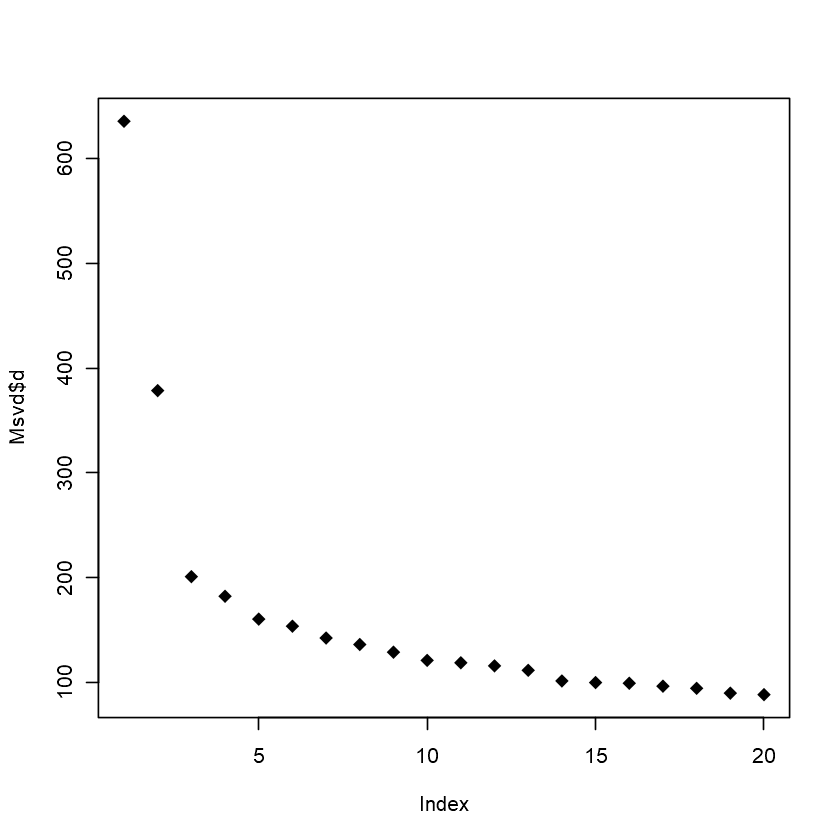

In [24]:
# scree plot: singular values against index
plot(Msvd$d, pch = 18, cex = 1.5)

The scree plot could be used for selecting the number of SVD dimensions $k$. The optimum $k$ lies at the "knee" of the resulting scree plot.

To improve SVD's interpretability, matrix $M$ could have been centered. Centering, however, does not preserve the sparsity of the matrix, and thus is often impossible in the context of big data sets. Instead, the interpretability of the dimensions extracted from the non-centered matrix can be improved by rotating SVD dimensions with use of rotation technique, like varimax, quartimax, equimax, etc.

In [26]:
Msvd = irlba(M, nv = 5)
u = Msvd$u # user scores on the SVD dimensions
v = Msvd$v # Likes scores on the SVD dimensions

# factor rotation
v_rot = unclass(varimax(Msvd$v)$loadings) # Likes scores on the varimax-rotated SVD dimensions
u_rot = as.matrix(M %*% v_rot) # user scores on the varimax-rotated SVD dimensions

### Interpreting Dimensions

The correlations between user scores on the varimax-rotated SVD dimensions ($U_{rot}$) and psychodemographic user traits:

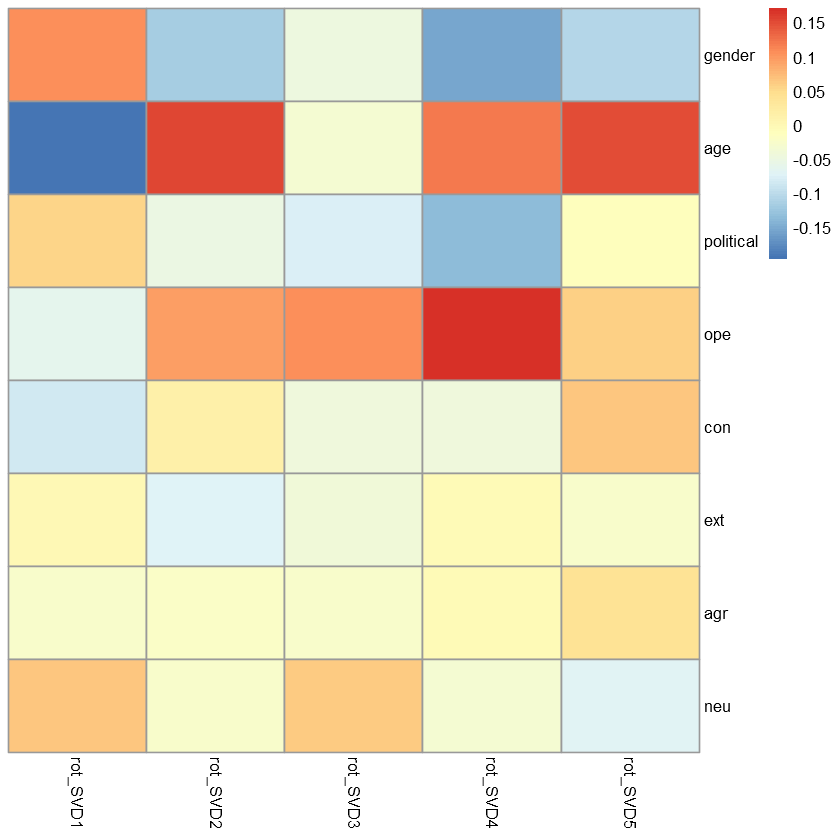

In [28]:
Csvd = cor(u_rot, users[,-1], use = "pairwise")
rownames(Csvd) = paste0("rot_SVD", 1:5)
pheatmap(t(Csvd), cluster_rows = FALSE, cluster_cols = FALSE)

In [29]:
top.svd = bottom.svd = list()

for (i in 1:5){
    f = order(v_rot[,i])
    top.svd[[i]] = colnames(M)[tail(f, n = 10)]
    bottom.svd[[i]] = colnames(M)[head(f, n = 10)]
}

In [30]:
top.svd # top 10 likes positively associated with each varimax-rotated SVD dimension

[[1]]
 [1] "My door was closed when you came in, dont walk off and leave it open."
 [2] "Spinny Chairs"                                                        
 [3] "Accomplishing something before the microwave reaches :00."            
 [4] "I love staying up late!"                                              
 [5] "Questions on a test that give away the answers to other questions"    
 [6] "Homemade Chocolate Chip Cookies"                                      
 [7] "Finding Money In Your Pocket"                                         
 [8] "Random laughter when remembering something"                           
 [9] "I hate waking up during a good dream and it won't come back!"         
[10] "Yelling at inanimate objects"                                         

[[2]]
 [1] "Weezer"          "The Cure"        "The Doors"       "The Who"        
 [5] "Nine Inch Nails" "Beck"            "Bob Dylan"       "Led Zeppelin"   
 [9] "Queen"           "Radiohead"      

[[3]]
 [1] "The Beatles"           "Green Day"             "Pink Floyd"           
 [4] "System of a Down"      "Red Hot Chili Peppers" "Nirvana"              
 [7] "Disturbed"             "Metallica"             "Family Guy"           
[10] "Linkin Park"          

[[4]]
 [1] "I fucking love science" "Amazon.com"             "NPR"                   
 [4] "Fight Club"             "Queen"                  "The Onion"             
 [7] "George Takei"           "The Colbert Report"     "The Daily Show"        
[10] "The Beatles"           

[[5]]
 [1] "Homemade Chocolate Chip Cookies" "Yelling at inanimate objects"   
 [3] "Brownies"                        "Staying Up Late"                
 [5] "bubblewrap"                      "Spinny Chairs"                  
 [7] "Cookie Dough"                    "Music"                          
 [9] "I love staying up late!"         "Finding Money In Your Pocket"

In [31]:
bottom.svd # top 10 likes negatively associated with each varimax-rotated SVD dimension

[[1]]
 [1] "Lil Wayne"     "T.I."          "The Hangover"  "Drake"        
 [5] "Family Guy"    "Eminem"        "Trey Songz"    "Bob Marley"   
 [9] "The Boondocks" "Nicki Minaj"  

[[2]]
 [1] "YouTube"      "Skittles"     "Facebook"     "Oreo"         "Starburst"   
 [6] "Disney"       "Adam Sandler" "Starbucks"    "Reese's"      "Music"       

[[3]]
 [1] "Will Smith"         "Oreo"               "Subway"            
 [4] "Target"             "DORY"               "Last Day of School"
 [7] "iTunes"             "Starbucks"          "Barack Obama"      
[10] "Reese's"           

[[4]]
 [1] "Linkin Park"      "Eminem"           "Paramore"         "Three Days Grace"
 [5] "3OH!3"            "Nickelback"       "Avril Lavigne"    "Twilight"        
 [9] "Taylor Swift"     "Lil Wayne"       

[[5]]
 [1] "Worst. Idea. Ever. [pause] Let's do it."                                    
 [2] "Who are you talking to?...... TELL THEM I SAY HI!!!!!!"                     
 [3] "mom, i could be dying and you're not answering the phone"                   
 [4] "Dear sleep, I know we had problems when I was younger, but now I love you"  
 [5] "My level of maturity changes depending on who im with."                     
 [6] "I forgot your name, so i'm waiting for somebody to say it."                 
 [7] "Send failed would you like to retry? Well obviously..."                     
 [8] "When you're so good at sarcasm no one can tell if you are serious or not"   
 [9] "You're angry at me for that ? Thats cool, just let me know when you grow up"
[10] "When you hit your hip on a counter and you feel like you just got shot."